# KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
columnname = pd.read_excel("features.xlsx")
column = columnname["degiskenismi"]

In [3]:
x_train = pd.read_excel("x_train.xlsx", names = column)
x_test = pd.read_excel("x_test.xlsx", names = column)
y_train = pd.read_excel("y_train.xlsx", names = ["activity"]) -1
y_test = pd.read_excel("y_test.xlsx", names = ["activity"]) -1

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [8]:
# Fitted Knn Model

In [5]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train.values.ravel())

KNeighborsClassifier()

In [9]:
# Accuracy

In [6]:
y_pred = knn.predict(x_test)

In [7]:
accuracy_score(y_test,y_pred)

0.9015614392396469

In [10]:
# Hyperparameter Optimization - GridSearchCV

In [11]:
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

In [12]:
#GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
 #            param_grid={'metric': ['euclidean', 'manhattan'],
  #                       'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
   #                      'weights': ['uniform', 'distance']})

In [13]:
# En iyi parametrelerin ve en iyi skorun bulunması
# print("En iyi parametreler: ", grid_search.best_params_)
# print("En iyi skor: ", grid_search.best_score_)

In [14]:
#En iyi parametreler:  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
#En iyi skor:  0.9187853076013015

In [20]:
# En iyi parametreleri kullanarak modeli eğitme
knn_best = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 9, weights =  'distance')
knn_best.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [21]:
# Test verileri üzerinde modelin performansını değerlendirme
accuracy = knn_best.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9168363883231501


In [22]:
y_pred = knn_best.predict(x_test)

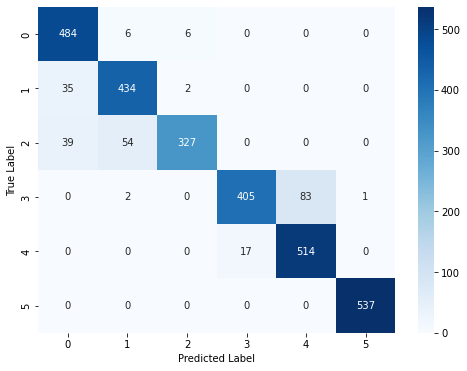

<Figure size 432x288 with 0 Axes>

In [43]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
plt.savefig("grafik.png", dpi=300)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       496
           1       0.88      0.92      0.90       471
           2       0.98      0.78      0.87       420
           3       0.96      0.82      0.89       491
           4       0.86      0.97      0.91       531
           5       1.00      1.00      1.00       537

    accuracy                           0.92      2946
   macro avg       0.92      0.91      0.91      2946
weighted avg       0.92      0.92      0.92      2946



In [57]:
knn = 92 , rf = 93 , svm = 85 , xgboost = 87

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [65]:
algorithms = ['KNN', 'RF', 'SVM', 'XGBoost']
accuracy = np.array([0.92, 0.93, 0.85, 0.87], dtype=float)


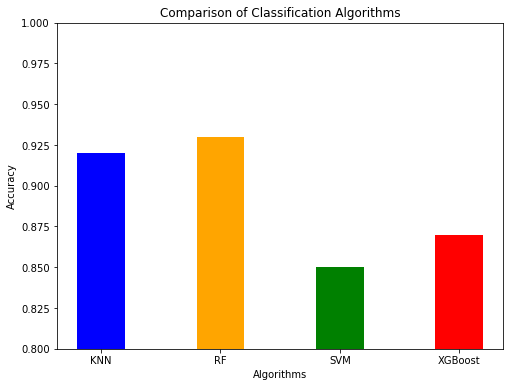

In [68]:
algorithms = ['KNN', 'RF', 'SVM', 'XGBoost']
accuracy = np.array([0.92, 0.93, 0.85, 0.87])

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(algorithms, accuracy, width=0.4, color=['blue', 'orange', 'green', 'red'])
ax.set_ylim([0.8, 1.0])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Algorithms')
ax.set_title('Comparison of Classification Algorithms')

plt.show()